In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse

$err=bias^2+v+\sigma_{\epsilon}^{2}$ is the equation for error

In [ ]:
NUM_DATASETS = 50
NOISE_VARIANCE = 0.5
MAX_POLY = 12
N = 25
Ntrain = int(0.9*N)

np.random.seed(2)

Polynomial regression

In [ ]:
# make a dataset with x^D, x^(D-1), ..., x^0
def make_poly(x, D):
  N = len(x)
  X = np.empty((N, D+1))
  for d in range(D+1):
    X[:,d] = x**d
    if d > 1:
      X[:,d] = (X[:,d] - X[:,d].mean()) / X[:,d].std()
  return X

def f(X):
  return np.sin(X)

In [ ]:
x_axis = np.linspace(-np.pi, np.pi, 100)
y_axis = f(x_axis)
X = np.linspace(-np.pi, np.pi, N)
np.random.shuffle(X)
f_X = f(X)
Xpoly = make_poly(X, MAX_POLY)
train_scores = np.zeros((NUM_DATASETS, MAX_POLY))
test_scores = np.zeros((NUM_DATASETS, MAX_POLY))
# squared_biases = np.zeros((NUM_DATASETS, MAX_POLY))
# test_predictions = np.zeros((N - Ntrain, NUM_DATASETS, MAX_POLY))
train_predictions = np.zeros((Ntrain, NUM_DATASETS, MAX_POLY))
prediction_curves = np.zeros((100, NUM_DATASETS, MAX_POLY))


In [ ]:
model = LinearRegression()


In [ ]:
for k in range(NUM_DATASETS):
  Y = f_X + np.random.randn(N)*NOISE_VARIANCE

  Xtrain = Xpoly[:Ntrain]
  Ytrain = Y[:Ntrain]

  Xtest = Xpoly[Ntrain:]
  Ytest = Y[Ntrain:]

  for d in range(MAX_POLY):
    model.fit(Xtrain[:,:d+2], Ytrain)
    predictions = model.predict(Xpoly[:,:d+2])

    # debug
    x_axis_poly = make_poly(x_axis, d+1)
    prediction_axis = model.predict(x_axis_poly)
    # plt.plot(x_axis, prediction_axis)
    # plt.show()

    prediction_curves[:,k,d] = prediction_axis

    train_prediction = predictions[:Ntrain]
    test_prediction = predictions[Ntrain:]

    train_predictions[:,k,d] = train_prediction # use this to calculate bias/variance later

    train_score = mse(train_prediction, Ytrain)
    test_score = mse(test_prediction, Ytest)

    train_scores[k,d] = train_score
    test_scores[k,d] = test_score

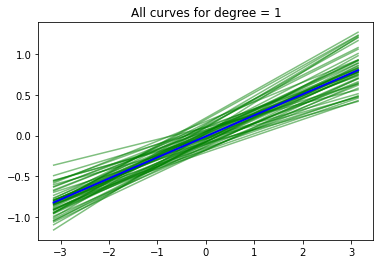

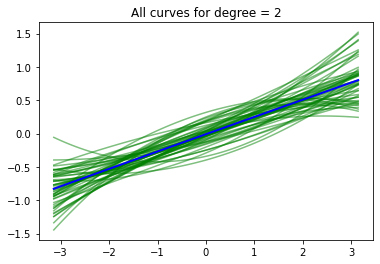

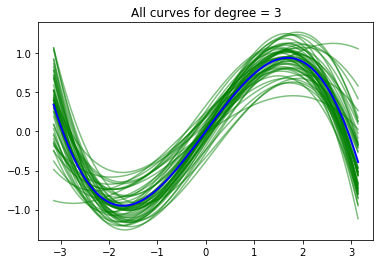

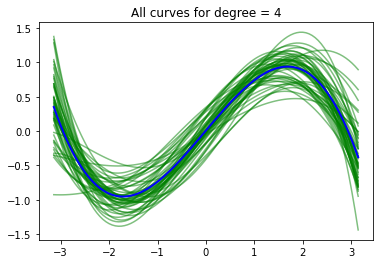

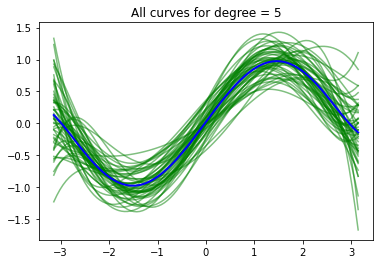

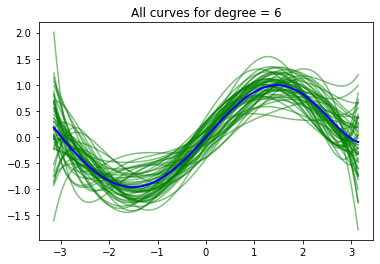

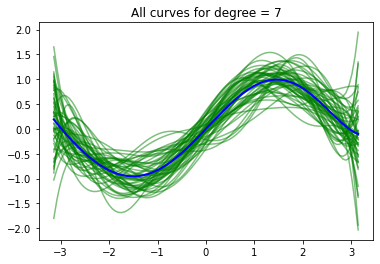

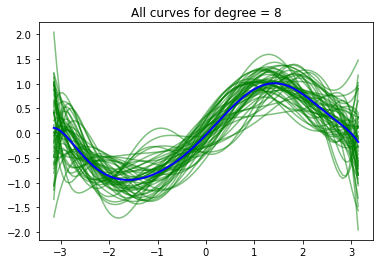

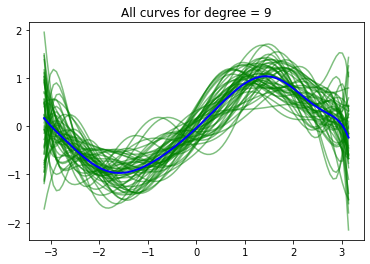

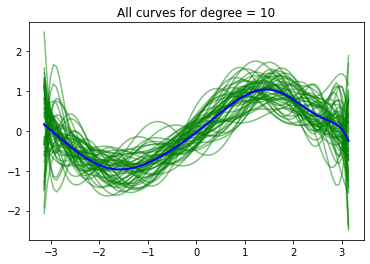

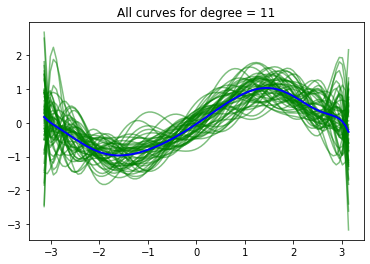

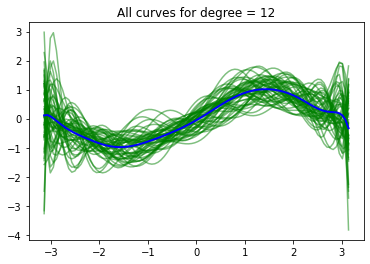

In [ ]:
for d in range(MAX_POLY):
  for k in range(NUM_DATASETS):
    plt.plot(x_axis, prediction_curves[:,k,d], color='green', alpha=0.5)
  plt.plot(x_axis, prediction_curves[:,:,d].mean(axis=1), color='blue', linewidth=2.0)
  plt.title("All curves for degree = %d" % (d+1))
  plt.show()

# calculate the squared bias
avg_train_prediction = np.zeros((Ntrain, MAX_POLY))
squared_bias = np.zeros(MAX_POLY)
f_Xtrain = f_X[:Ntrain]
for d in range(MAX_POLY):
  for i in range(Ntrain):
    avg_train_prediction[i,d] = train_predictions[i,:,d].mean()
  squared_bias[d] = ((avg_train_prediction[:,d] - f_Xtrain)**2).mean()

In [ ]:
variances = np.zeros((Ntrain, MAX_POLY))
for d in range(MAX_POLY):
  for i in range(Ntrain):
    delta = train_predictions[i,:,d] - avg_train_prediction[i,d]
    variances[i,d] = delta.dot(delta) / len(delta)
variance = variances.mean(axis=0)



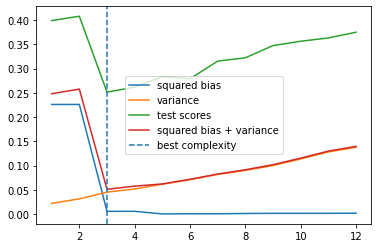

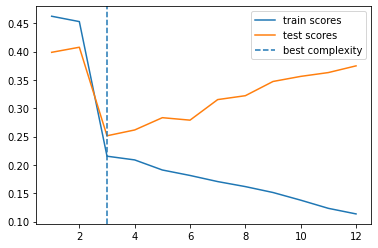

In [ ]:
# make bias-variance plots
degrees = np.arange(MAX_POLY) + 1
best_degree = np.argmin(test_scores.mean(axis=0)) + 1
plt.plot(degrees, squared_bias, label='squared bias')
plt.plot(degrees, variance, label='variance')
plt.plot(degrees, test_scores.mean(axis=0), label='test scores')
plt.plot(degrees, squared_bias + variance, label='squared bias + variance')
plt.axvline(x=best_degree, linestyle='--', label='best complexity')
plt.legend()
plt.show()

# train score vs test score
plt.plot(degrees, train_scores.mean(axis=0), label='train scores')
plt.plot(degrees, test_scores.mean(axis=0), label='test scores')
plt.axvline(x=best_degree, linestyle='--', label='best complexity')
plt.legend()
plt.show()